In [1]:
!pip install opencv-python mediapipe
import matplotlib.pyplot as plt

In [2]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
import math
import cv2
from time import time
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5,min_tracking_confidence=0.5, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

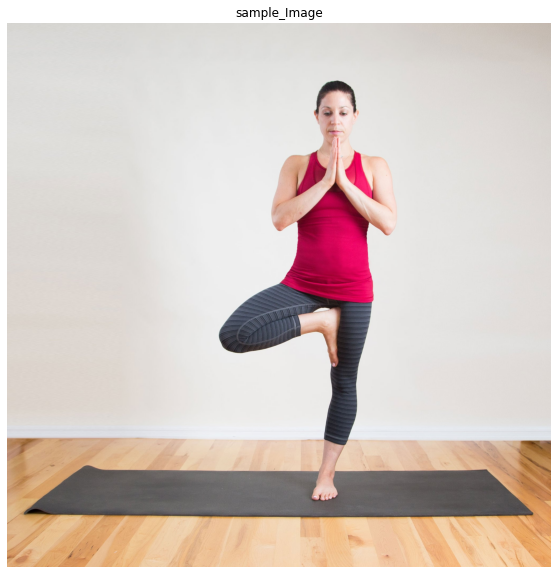

In [4]:
#Input_Image
sample_img  = cv2.imread('tree.jpg')
plt.figure(figsize = [10,10])
plt.title("sample_Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [5]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.6072188019752502
y: 0.18074578046798706
z: -0.12924379110336304
visibility: 0.9998394250869751

LEFT_EYE_INNER:
x: 0.6155312657356262
y: 0.16805186867713928
z: -0.10564687103033066
visibility: 0.999879002571106



In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 1243.5841064453125
y: 370.1673583984375
z: -264.6912841796875
visibility: 0.9998394250869751

LEFT_EYE_INNER:
x: 1260.6080322265625
y: 344.17022705078125
z: -216.3647918701172
visibility: 0.999879002571106



In [7]:
def detectPose(image, pose, display=True):
  
    
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #  Pose Detection.
    results = pose.process(imageRGB)
    
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

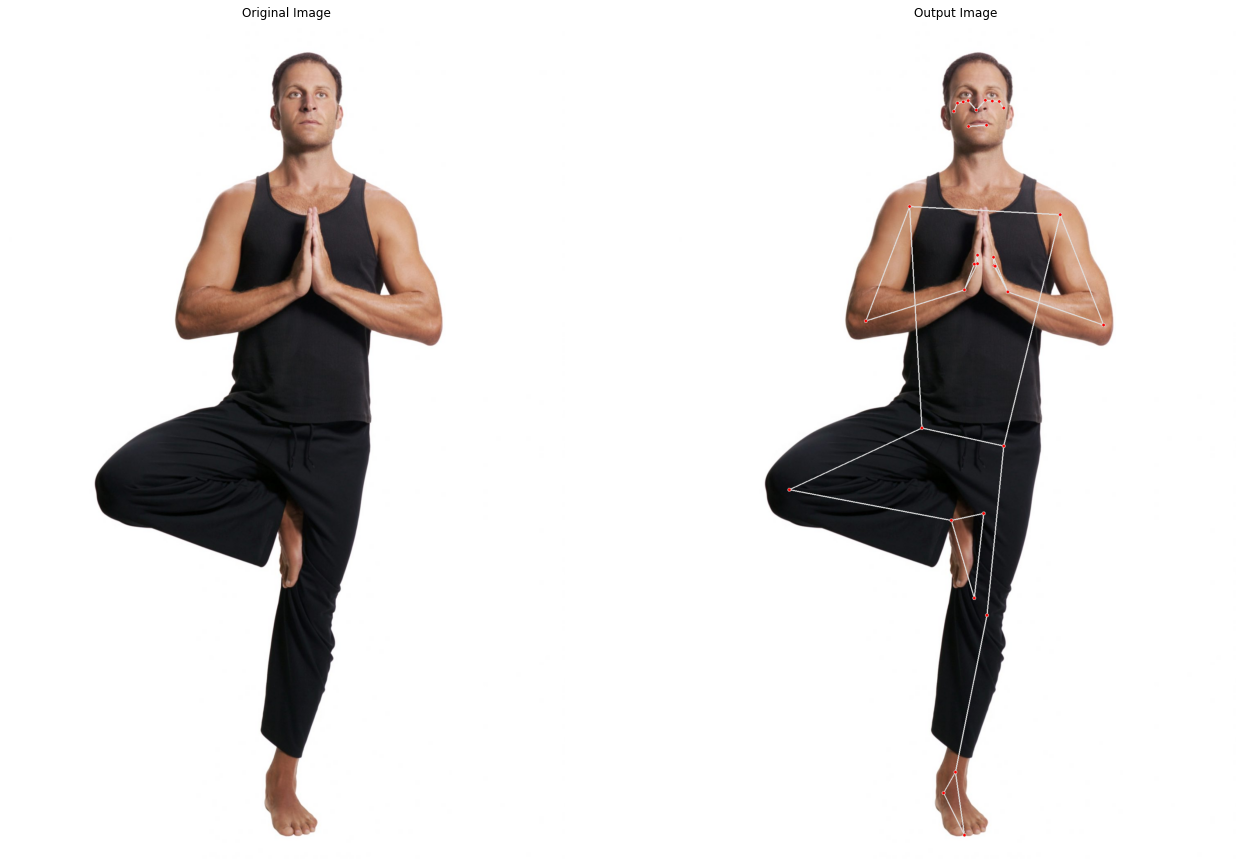

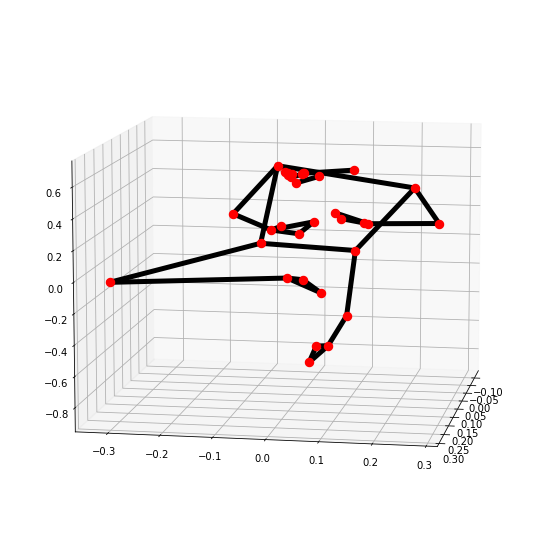

In [10]:
image = cv2.imread('tree2.jpg')
detectPose(image, pose, display=True)
# print(landmarks)

In [8]:
def calculateAngle(landmark1, landmark2, landmark3):
  

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    
    if angle < 0:

        
        angle += 360
    
    
    return angle

In [9]:
def classifyPose(landmarks, output_image, display=False):
   
   
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    left_elbow_anglev=str(left_elbow_angle)
    print("left elbow angle="+left_elbow_anglev)
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]) 
    right_elbow_anglev=str(right_elbow_angle)
    print("right elbow angle="+right_elbow_anglev)
    
    
    
    
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    left_shoulder_anglev=str(left_shoulder_angle)
    print("left shoulder angle="+left_shoulder_anglev)
    
    
    

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    right_shoulder_anglev=str(right_shoulder_angle)
    print("right shoulder angle="+right_shoulder_anglev)
    
    

   
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    left_knee_anglev=str(left_knee_angle)
    print("left knee angle="+left_knee_anglev)

    
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    right_knee_anglev=str(right_knee_angle)
    print("right knee angle="+right_knee_anglev)
    
    
    
    # Check if it is the warrior II pose or the T pose. 
   
    
    # Check if arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                
                label = 'T Pose'
    
    # tree pose.
  
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 20 and right_knee_angle < 57:

           
            label = 'Tree Pose'
     
    #check for mountain pose
    if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
          if left_shoulder_angle > 0 and left_shoulder_angle < 30 and right_shoulder_angle > 0 and right_shoulder_angle < 30:
                
               #  mountain pose.
                label = 'Mountain Pose'
                
     #check for bridge pose
    if left_knee_angle > 270 and left_knee_angle < 295 and right_knee_angle > 270 and right_knee_angle < 295:
          if left_shoulder_angle > 310 and left_shoulder_angle < 330 and right_shoulder_angle > 30 and right_shoulder_angle < 50:
            if left_elbow_angle > 165 and left_elbow_angle < 185 and right_elbow_angle > 165 and right_elbow_angle < 185:
                label = 'bridge Pose' 
                
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0,0,255)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 5)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

left elbow angle=324.4736770737042
right elbow angle=35.354714735750726
left shoulder angle=24.083752903563262
right shoulder angle=18.85469456663571
left knee angle=187.1501187281895
right knee angle=23.85861056649768


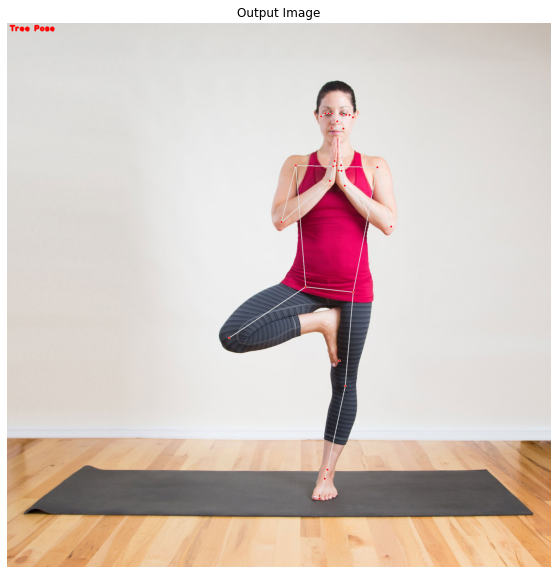

In [13]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('tree.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=166.47195643799748
right elbow angle=192.06394343089005
left shoulder angle=92.30764336396233
right shoulder angle=93.90123965653483
left knee angle=182.49447650878028
right knee angle=174.68545433005525


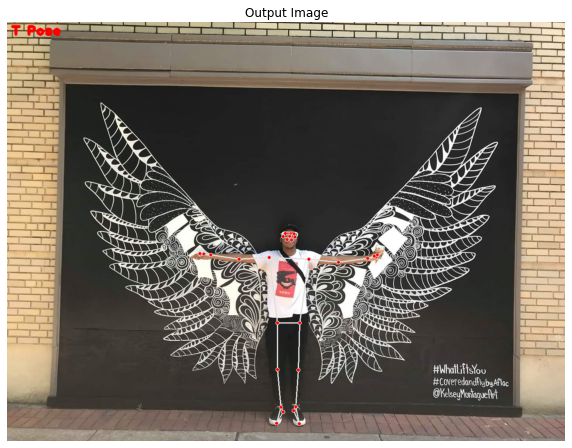

In [10]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('TPose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=111.29776587261591
right elbow angle=247.34639994636888
left shoulder angle=166.80399469342083
right shoulder angle=157.85372065774985
left knee angle=184.91055044959236
right knee angle=56.27331005681965


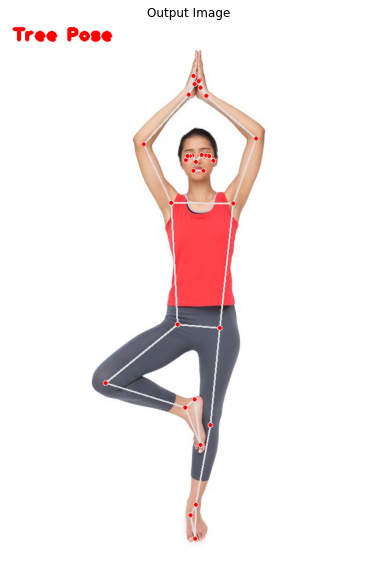

In [15]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('img.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=178.06941255883302
right elbow angle=180.04874575947693
left shoulder angle=102.17548631456461
right shoulder angle=101.02104863873961
left knee angle=176.42927045542433
right knee angle=95.85305820344303


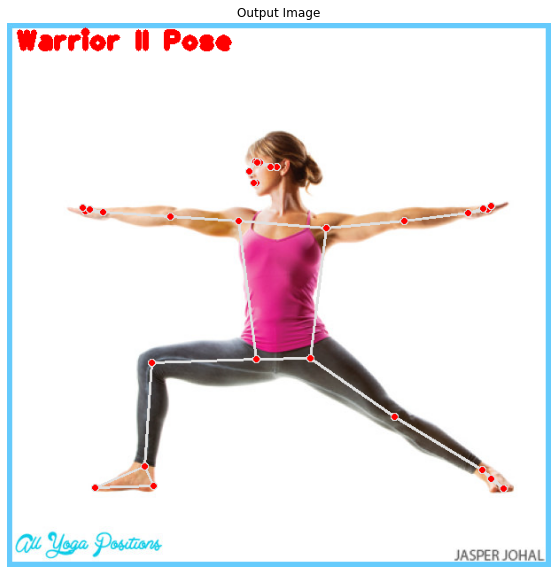

In [16]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('w2.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=169.38034472384487
right elbow angle=186.17806490212834
left shoulder angle=98.13010235415598
right shoulder angle=102.83560948640144
left knee angle=174.1706285314626
right knee angle=184.9697407281103


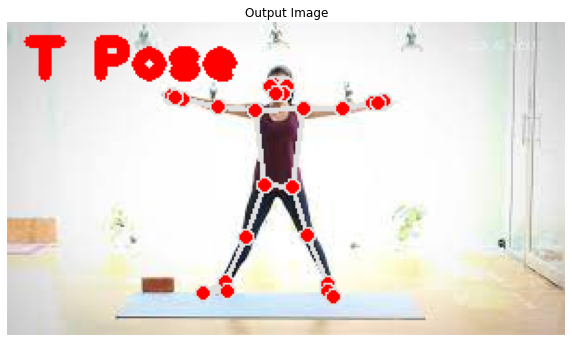

In [17]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('TP.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=312.8685227883229
right elbow angle=44.59469489086925
left shoulder angle=40.07561538600159
right shoulder angle=28.599332522959404
left knee angle=179.22476320730294
right knee angle=28.5577235919441


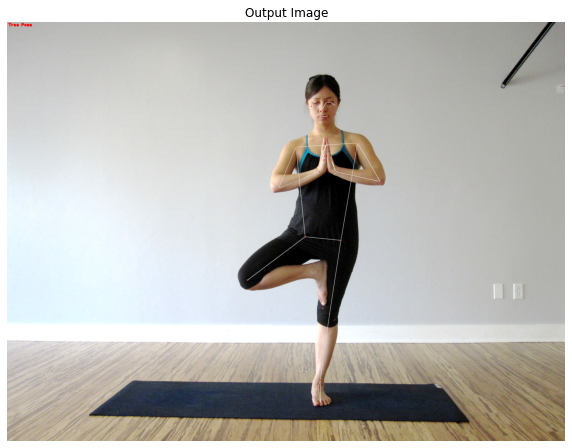

In [86]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('12.png')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=321.9529574681739
right elbow angle=33.52752674353853
left shoulder angle=4.160255102460627
right shoulder angle=30.54757174890703
left knee angle=324.52002186577414
right knee angle=176.18592516570965


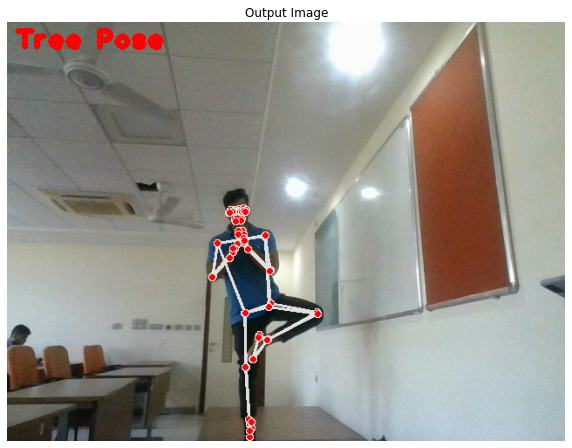

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    # read frame
    _, frame = cap.read()
    try:
        # resize the frame for portrait video
        # frame = cv2.resize(frame, (350, 600))
        # convert to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # process the frame for pose detection
        pose_results = pose.process(frame_rgb)
        # print(pose_results.pose_landmarks)
        
        # draw skeleton on the frame
        mp_drawing.draw_landmarks(frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
#         # Check if any landmarks are found.
        if results.pose_landmarks:
    
            output_image, landmarks = detectPose(frame, pose, display=False)
            if landmarks:
                   output_image, label=  classifyPose(landmarks, output_image, display=True)
            print(label)
        # display the frame
        cv2.imshow('Output', frame)
    except:
        break
        
    if cv2.waitKey(1) == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()


left elbow angle=179.35221100047198
right elbow angle=169.3428940595182
left shoulder angle=108.54073275953948
right shoulder angle=108.56546697400947
left knee angle=186.49431005828063
right knee angle=179.62146935361739


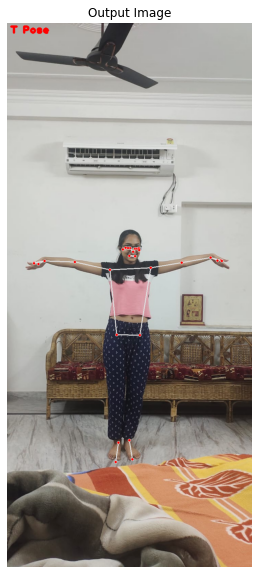

In [98]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('chunnut.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=295.13555975246237
right elbow angle=61.15869982422531
left shoulder angle=59.2500326978036
right shoulder angle=55.50985626145813
left knee angle=315.4334204917579
right knee angle=171.12485456543376


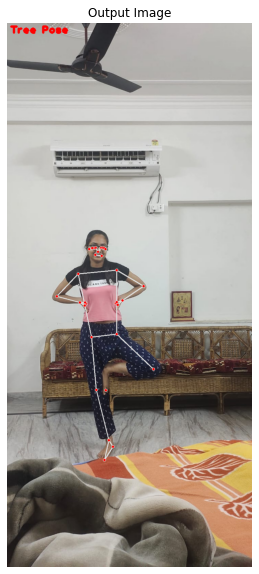

In [157]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('chunnutree.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=151.92751306414704
right elbow angle=204.4039716888516
left shoulder angle=181.17418274847563
right shoulder angle=182.36717852561048
left knee angle=176.53177074108288
right knee angle=180.38539180773304


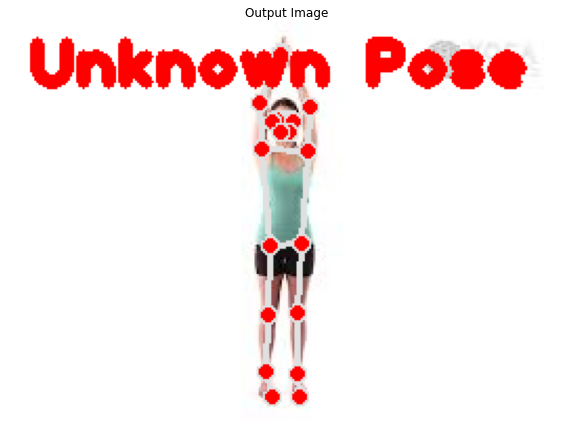

In [156]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('mountain Pose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=172.12511101145262
right elbow angle=190.48509521468446
left shoulder angle=19.835925026705723
right shoulder angle=19.727341614850417
left knee angle=177.07965986099222
right knee angle=176.99847567230086


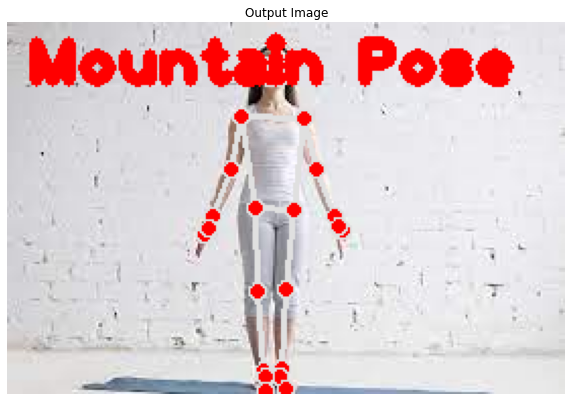

In [103]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('mountain.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=178.03091476510403
right elbow angle=173.79655209830818
left shoulder angle=320.26255973239074
right shoulder angle=41.490196876751554
left knee angle=286.2627295300401
right knee angle=287.7043302392478


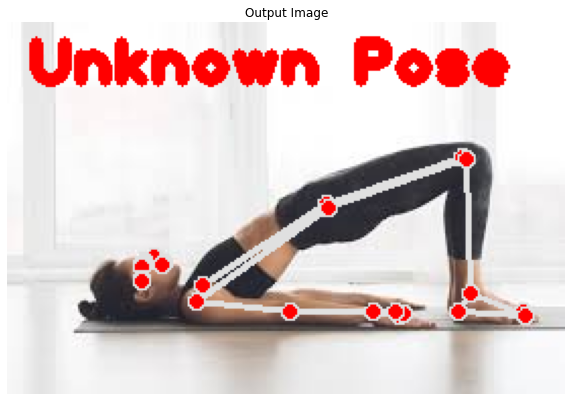

In [105]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('check.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=178.03091476510403
right elbow angle=173.79655209830818
left shoulder angle=320.26255973239074
right shoulder angle=41.490196876751554
left knee angle=286.2627295300401
right knee angle=287.7043302392478


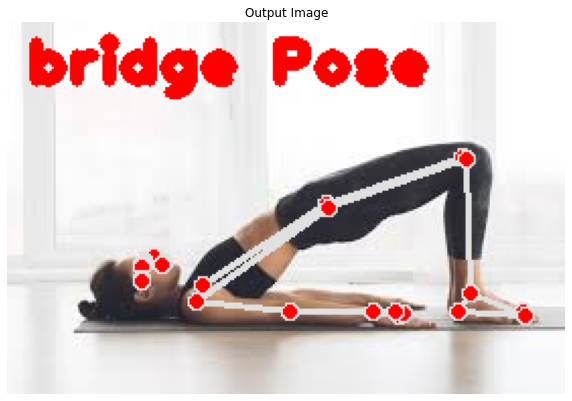

In [108]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('check.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=171.5120391136365
right elbow angle=174.31450906440494
left shoulder angle=308.4222699742243
right shoulder angle=47.69555091480368
left knee angle=276.23874349158314
right knee angle=284.41682577791244


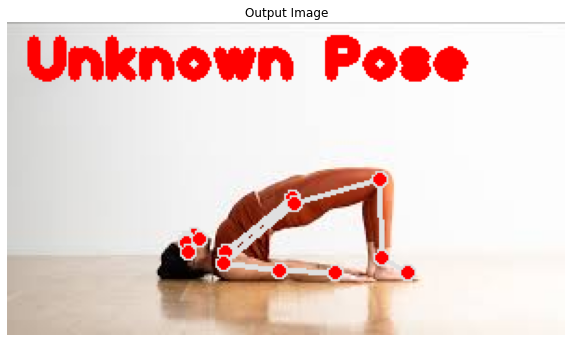

In [109]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('bridge.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=192.8446122799936
right elbow angle=194.79924115994285
left shoulder angle=192.4873321968852
right shoulder angle=167.33777150257134
left knee angle=93.62223306873098
right knee angle=177.82794882023794


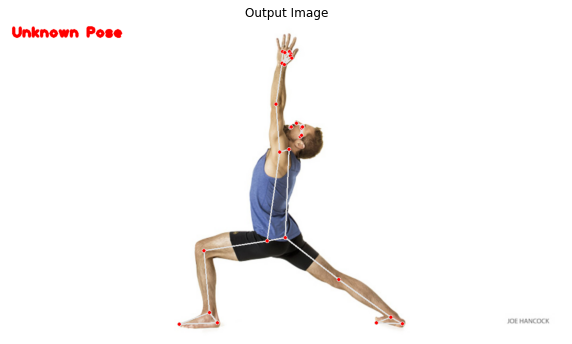

In [126]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('w23.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=186.24558512427302
right elbow angle=176.0138082103047
left shoulder angle=104.28644178812405
right shoulder angle=102.90596173506952
left knee angle=247.0488295749257
right knee angle=182.1148854720773


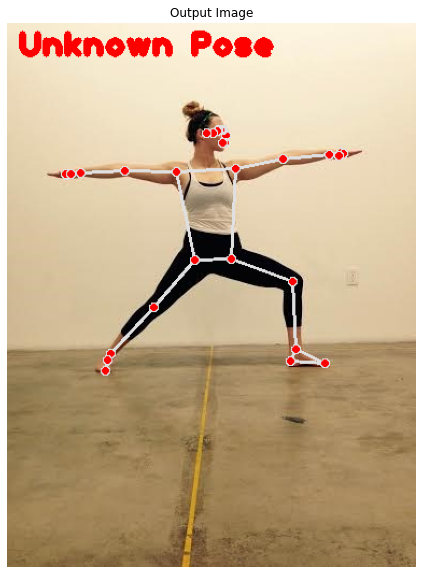

In [127]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('1234.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=324.4736770737042
right elbow angle=35.354714735750726
left shoulder angle=24.083752903563262
right shoulder angle=18.85469456663571
left knee angle=187.1501187281895
right knee angle=23.85861056649768


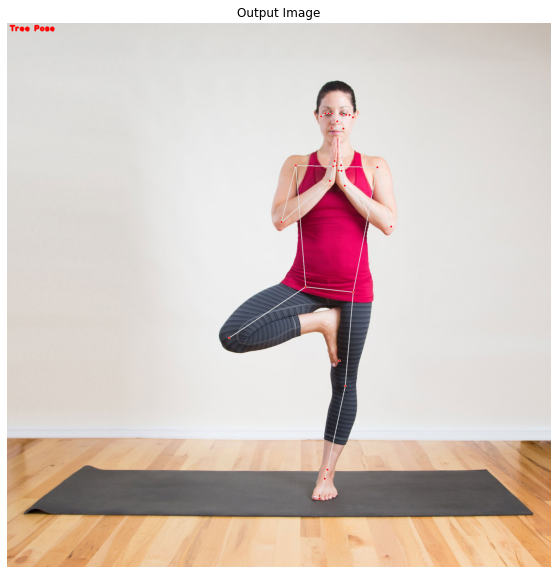

In [128]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('tree.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=310.52809612990364
right elbow angle=51.58319126718099
left shoulder angle=35.1369042875378
right shoulder angle=24.082119732306456
left knee angle=185.68284562695783
right knee angle=35.71229227350417


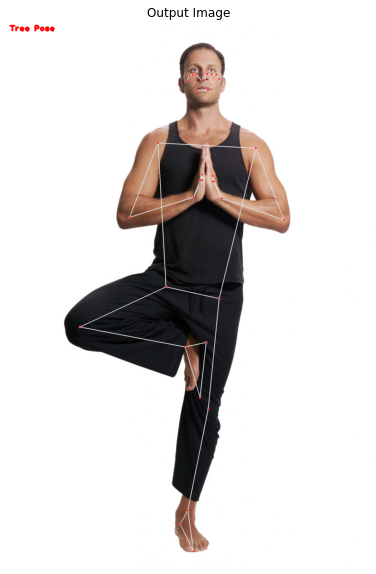

In [129]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('tree2.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [2]:
if distanceCalculate(rightShoulder,rightWrist)<130:
        pushUpStart = 1
    elif pushUpStart and distanceCalculate(rightShoulder,rightWrist)>250:
        pushUpCount = pushUpCount + 1
        pushUpStart = 0

    print(pushUpCount)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [3]:
def distanceCalculate(p1, p2):
    """p1 and p2 in format (x1,y1) and (x2,y2) tuples"""
    dis = ((p2[0] - p1[0]) * 2 + (p2[1] - p1[1]) * 2) ** 0.5
    return dis


pushUpStart = 0
pushUpCount = 0



In [4]:
  nosePoint = (int(results.pose_landmarks.landmark[0].x*image_width), int(results.pose_landmarks.landmark[0].y*image_height))
    leftWrist = (int(results.pose_landmarks.landmark[15].x*image_width), int(results.pose_landmarks.landmark[15].y*image_height))
    rightWrist = (int(results.pose_landmarks.landmark[16].x*image_width), int(results.pose_landmarks.landmark[16].y*image_height))
    leftShoulder = (int(results.pose_landmarks.landmark[11].x*image_width), int(results.pose_landmarks.landmark[11].y*image_height))
    rightShoulder = (int(results.pose_landmarks.landmark[12].x*image_width), int(results.pose_landmarks.landmark[12].y*image_height))

  

    
    if distanceCalculate(rightShoulder,rightWrist)<130:
        pushUpStart = 1
    elif pushUpStart and distanceCalculate(rightShoulder,rightWrist)>250:
        pushUpCount = pushUpCount + 1
        pushUpStart = 0

    print(pushUpCount)

    font = cv2.FONT_HERSHEY_SIMPLEX
  

IndentationError: unexpected indent (Temp/ipykernel_832/699483172.py, line 2)

In [5]:
nosePoint = (int(results.pose_landmarks.landmark[0].x*image_width), int(results.pose_landmarks.landmark[0].y*image_height))
    leftWrist = (int(results.pose_landmarks.landmark[15].x*image_width), int(results.pose_landmarks.landmark[15].y*image_height))
    rightWrist = (int(results.pose_landmarks.landmark[16].x*image_width), int(results.pose_landmarks.landmark[16].y*image_height))
    leftShoulder = (int(results.pose_landmarks.landmark[11].x*image_width), int(results.pose_landmarks.landmark[11].y*image_height))
    rightShoulder = (int(results.pose_landmarks.landmark[12].x*image_width), int(results.pose_landmarks.landmark[12].y*image_height))

  

    
    if distanceCalculate(rightShoulder,rightWrist)<130:
        pushUpStart = 1
    elif pushUpStart and distanceCalculate(rightShoulder,rightWrist)>250:
        pushUpCount = pushUpCount + 1
        pushUpStart = 0

    print(pushUpCount)

    font = cv2.FONT_HERSHEY_SIMPLEX
  

IndentationError: unexpected indent (Temp/ipykernel_832/1441842989.py, line 2)

In [6]:
    nosePoint = (int(results.pose_landmarks.landmark[0].x*image_width), int(results.pose_landmarks.landmark[0].y*image_height))
    leftWrist = (int(results.pose_landmarks.landmark[15].x*image_width), int(results.pose_landmarks.landmark[15].y*image_height))
    rightWrist = (int(results.pose_landmarks.landmark[16].x*image_width), int(results.pose_landmarks.landmark[16].y*image_height))
    leftShoulder = (int(results.pose_landmarks.landmark[11].x*image_width), int(results.pose_landmarks.landmark[11].y*image_height))
    rightShoulder = (int(results.pose_landmarks.landmark[12].x*image_width), int(results.pose_landmarks.landmark[12].y*image_height))

  

    
    if distanceCalculate(rightShoulder,rightWrist)<130:
        pushUpStart = 1
    elif pushUpStart and distanceCalculate(rightShoulder,rightWrist)>250:
        pushUpCount = pushUpCount + 1
        pushUpStart = 0

    print(pushUpCount)

    font = cv2.FONT_HERSHEY_SIMPLEX
  


NameError: name 'results' is not defined